In [1]:
# Fill in student ID and name
# 
student_id = "Ankita "
student_first_last_name = "Ankita"
print(student_id, student_first_last_name)

Ankita  Ankita


In [4]:
"""
	Firebase Realtime database demonstration.
    
    @Ahsan Habib
    School of IT,
    Deakin University, Australia.
"""

# Install libraris, if not yet.
! pip install firebase_admin pandas

import firebase_admin

databaseURL = '<your database URL>'
cred_obj = firebase_admin.credentials.Certificate(
    "sensordataproject-545b1-firebase-adminsdk-fbsvc-1102705c57.json"
)
default_app = firebase_admin.initialize_app(cred_obj, {
    'databaseURL': "https://sensordataproject-545b1-default-rtdb.firebaseio.com/"
})

In [5]:
from firebase_admin import db

# A reference point is always needed to be set
# before any operation is carried out on a database.
# 
ref = db.reference()

# JSON format data (key/value pair)
data = {  # Outer {} contains inner data structure
	"Book1":
	{
		"Title": "The Fellowship of the Ring",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100
	},
	"Book2":
	{
		"Title": "The Two Towers",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100	
	},
	"Book3":
	{
		"Title": "The Return of the King",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100
	},
	"Book4":
	{
		"Title": "Brida",
		"Author": "Paulo Coelho",
		"Genre": "Fiction",
		"Price": 100
	}
}

# JSON format data is set (overwritten) to the reference 
# point set at /, which is the root node.
# 
ref.set(data)

In [6]:
ref = db.reference("/")  # set ref point

# query all data under the ref
books = ref.get()  
print(books)
print(type(books))

# print each item separately
for key, value in books.items():
    print(f"{key}: {value}")


# Query /Book1
ref = db.reference("/Book1")
books = ref.get()
print(books)

{'Book1': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}, 'Book2': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}, 'Book3': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}, 'Book4': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}
<class 'dict'>
Book1: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}
Book2: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}
Book3: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}
Book4: {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}
{'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}


In [7]:
# Write using push() function
# Note that a set() is called on top of push()
# 
ref = db.reference("/")
ref.set({
	"Books":
	{
		"Best_Sellers": -1
	}
})

ref = db.reference("/Books/Best_Sellers")

for key, value in data.items():
	ref.push().set(value)

In [8]:
# Update data
# 
# Requirement: The price of the books by 
# J. R. R. Tolkien is reduced to 80 units to 
# offer a discount.
# 
ref = db.reference("/Books/Best_Sellers/")
best_sellers = ref.get()
print(best_sellers)
for key, value in best_sellers.items():
	if(value["Author"] == "J.R.R. Tolkien"):
		value["Price"] = 90
		ref.child(key).update({"Price":80})

{'-OY8pUS2Z0dpBv83-Ar0': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}, '-OY8pU_AR970KmYcdhc3': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}, '-OY8pUh7KZbRoCKgaF_w': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}, '-OY8pUpEI9DOdWrm5bdZ': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}


In [9]:
# Let's delete all best seller books 
# with J.R.R. Tolkien as the author.
# 
ref = db.reference("/Books/Best_Sellers")

for key, value in best_sellers.items():
	if(value["Author"] == "J.R.R. Tolkien"):
		ref.child(key).set({})

In [10]:
# Delete all best_seller data.
# 
ref = db.reference("/Books/Best_Sellers/")
best_sellers = ref.get()
print(best_sellers)
print(type(best_sellers))

{'-OY8pUpEI9DOdWrm5bdZ': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}
<class 'dict'>


In [12]:
ref = db.reference("/Books/Best_Sellers")
ref.set({})

#Question: Create a sensor data structure for DHT22 sensor which contains
#attributes such as sensor_name, timestamp, temperature and humidity.
#Remember there will be other sensors with different sensor variables such as
#DHT22 has 2 variables, accelerometer sensor has 3. For each such sensor,
##you will need to gather data over time. Discuss how you are going to handle
#multiple data values in JSON format? Justify your design
#Answer : 

In [15]:
import firebase_admin
from firebase_admin import credentials, db

# 1) Put your downloaded service-account JSON in the same folder, e.g. service_key.json
cred = credentials.Certificate("sensordataproject-545b1-firebase-adminsdk-fbsvc-1102705c57.json")

# 2) Replace with your database URL from the Realtime Database "Data" tab
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        "databaseURL": "https://sensordataproject-545b1-default-rtdb.firebaseio.com/"
    })


#Question: Generate some random data for DHT22 sensor, insert data to
#database, query all data and screenshot the output here

In [16]:
import random, time, datetime
from firebase_admin import db

root = db.reference("/")                # root
dht22_ref = root.child("sensors").child("DHT22").child("device_001").child("readings")

# Generate & insert 5 fake readings (1 sec apart)
for _ in range(5):
    now = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
    reading = {
        "sensor_name": "DHT22",
        "temperature": round(random.uniform(20.0, 28.0), 1),
        "humidity": round(random.uniform(35.0, 65.0), 1)
    }
    # use timestamp key (or dht22_ref.push(reading) if you prefer unique keys)
    dht22_ref.child(now).set(reading)
    time.sleep(1)

# Query all data under this device
all_data = dht22_ref.get()
print(all_data)


C:\Users\Andil\AppData\Local\Temp\ipykernel_17936\3958829034.py:9: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"


{'2025-08-20T23:43:49Z': {'humidity': 64.4, 'sensor_name': 'DHT22', 'temperature': 21.8}, '2025-08-20T23:43:50Z': {'humidity': 64.4, 'sensor_name': 'DHT22', 'temperature': 27.2}, '2025-08-20T23:43:52Z': {'humidity': 45.9, 'sensor_name': 'DHT22', 'temperature': 21.6}, '2025-08-20T23:43:53Z': {'humidity': 53.0, 'sensor_name': 'DHT22', 'temperature': 21.0}, '2025-08-20T23:43:54Z': {'humidity': 61.7, 'sensor_name': 'DHT22', 'temperature': 27.1}}


Question: Generate some random data for the SR04 Ultrasonic sensor, insert
data to database, query all data and screenshot the output here.

In [17]:
sr04_ref = db.reference("/").child("sensors").child("SR04").child("device_002").child("readings")

for _ in range(5):
    now = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
    reading = {
        "sensor_name": "SR04",
        "distance_cm": round(random.uniform(5.0, 200.0), 1)
    }
    sr04_ref.child(now).set(reading)
    time.sleep(1)

print(sr04_ref.get())


C:\Users\Andil\AppData\Local\Temp\ipykernel_17936\2101272130.py:4: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"


{'2025-08-20T23:46:31Z': {'distance_cm': 179.8, 'sensor_name': 'SR04'}, '2025-08-20T23:46:32Z': {'distance_cm': 186.9, 'sensor_name': 'SR04'}, '2025-08-20T23:46:34Z': {'distance_cm': 125.7, 'sensor_name': 'SR04'}, '2025-08-20T23:46:35Z': {'distance_cm': 134.9, 'sensor_name': 'SR04'}, '2025-08-20T23:46:36Z': {'distance_cm': 84.2, 'sensor_name': 'SR04'}}


Firebase Realtime database generates events on data operations.
You can refer to section ‘Handling Realtime Database events’ in the
document (https://firebase.google.com/docs/functions/database-events?
gen=2nd ). Discuss in the active learning session and summarise the idea of
database events and how it is handled using Python SDK.
Note that these events are useful when your sensors (from Arduino script)
store data directly to Firebase Realtime database and you would like to track
data update actions from a central Python application such as a monitoring
dashboard

In [21]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# 1. Initialize Firebase app with service account
cred = credentials.Certificate("sensordataproject-545b1-firebase-adminsdk-fbsvc-1102705c57.json")
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://sensordataproject-545b1-default-rtdb.firebaseio.com/'
    })

# 2. Reference the location of sensor data
sensor_ref = db.reference('sensors/temperature')  # Adjust path as per your DB

# 3. Define a callback function for data changes
def listener(event):
    """
    This function is called whenever there is a database event.
    'event.event_type' can be 'put', 'patch' etc.
    'event.path' shows the location of the change.
    'event.data' contains the updated value.
    """
    print(f"Event type: {event.event_type}")
    print(f"Path: {event.path}")
    print(f"Data: {event.data}")
    print("-------------------------------")

# 4. Attach the listener to the reference
sensor_ref.listen(listener)

# Keep the program running to listen continuously
while True:
    pass


Event type: put
Path: /
Data: None
-------------------------------
Event type: put
Path: /
Data: None
-------------------------------
Event type: put
Path: /
Data: None
-------------------------------
Event type: put
Path: /
Data: None
-------------------------------


Exception in thread Thread-9 (_start_listen):
Traceback (most recent call last):
  File "c:\Users\Andil\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\response.py", line 779, in _error_catcher
    yield
  File "c:\Users\Andil\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\response.py", line 904, in _raw_read
    data = self._fp_read(amt, read1=read1) if not fp_closed else b""
           ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^
  File "c:\Users\Andil\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\response.py", line 887, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ~~~~~~~~~~~~~^^^^^
  File "c:\Users\Andil\AppData\Local\Programs\Python\Python313\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
  File "c:\Users\Andil\AppData\Local\Programs\Python\Python313\Lib\socket.py", line 719, in readinto
    return self._sock.recv_into(b)
           ~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users

KeyboardInterrupt: 

TASKSHEET 5.1P 


In this task, we captured gyroscope readings from the LSM6DS3 sensor integrated into the Arduino Nano 33 IoT. The sensor records three axes of rotational movement: x, y, and z. The data was collected over time, transmitted to a Python script via serial communication, and uploaded to a Firebase Realtime Database using the Firebase Admin SDK. After completing data collection, we retrieved the data from Firebase, cleaned it to remove any invalid or missing values, saved it as a CSV file, and plotted the x, y, and z variables using line graphs. This exercise highlighted how to connect hardware sensors with software, perform real-time data acquisition, store data in the cloud, and conduct basic data analysis and visualization.


In [25]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Use the existing cred variable defined earlier
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://sensordataproject-545b1-default-rtdb.firebaseio.com/'  # Replace with your database URL
    })


In [29]:
import os
print(os.getcwd())


c:\Users\Andil\Downloads


In [30]:
with open('C:/Users/Andil/Downloads/gyro_data.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        print(row)


{'ï»¿Timestamp': '6:16:38 am.688', 'Value': '0.45,-33.51,-105.10,-108.15\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:38 am.778', 'Value': '0.55,-60.30,-49.32,-47.61\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:38 am.889', 'Value': '0.66,-51.64,-17.15,-37.05\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:38 am.985', 'Value': '0.76,-23.86,-4.52,-27.10\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.97', 'Value': '0.86,-17.09,-6.41,-14.71\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.193', 'Value': '0.96,-0.31,1.04,-8.06\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.306', 'Value': '1.07,-3.48,2.26,-9.64\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.402', 'Value': '1.17,-11.84,-2.26,-19.71\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.513', 'Value': '1.27,0.31,-3.36,-33.39\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 am.609', 'Value': '1.38,14.34,0.73,-46.26\\r\\n', 'Type': 'received'}
{'ï»¿Timestamp': '6:16:39 

In [32]:
# Reference to your Firebase location (like 'gyroscope_data')
ref = db.reference('gyroscope_data')

# Open CSV and push each row
with open('C:/Users/Andil/Downloads/gyro_data.csv', 'r') as file:  # Use your actual path
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        try:
            # Prepare data in correct format
            data = {
                'timestamp': row.get('timestamp', row.get('ï»¿Timestamp', '')),  # Try both possible keys
                'x': float(row.get('x', 0)),
                'y': float(row.get('y', 0)),
                'z': float(row.get('z', 0))
            }
            # Push to Firebase
            ref.push(data)
        except ValueError:
            # Skip rows with invalid data
            print("Skipping row:", row)


In [33]:
import pandas as pd

# Reference to the same Firebase node
ref = db.reference('gyroscope_data')

# Get all data from Firebase
all_data = ref.get()

# Convert Firebase data (dict) to a list
data_list = []
for key, value in all_data.items():
    try:
        # Ensure values are numbers
        data_list.append({
            'timestamp': value['timestamp'],
            'x': float(value['x']),
            'y': float(value['y']),
            'z': float(value['z'])
        })
    except (ValueError, KeyError):
        # Skip any invalid data
        print("Skipping invalid entry:", value)

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Save as clean CSV
df.to_csv('gyro_data_clean.csv', index=False)

print("Clean CSV saved as 'gyro_data_clean.csv'.")


Clean CSV saved as 'gyro_data_clean.csv'.


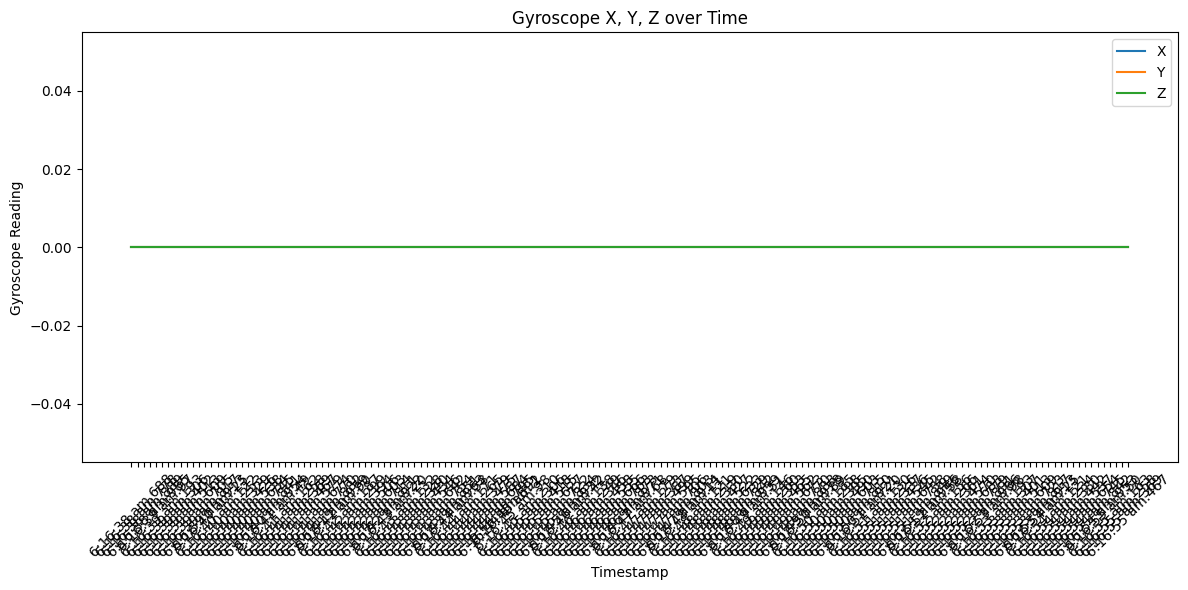

In [34]:
import matplotlib.pyplot as plt

# Read the clean CSV
df = pd.read_csv('gyro_data_clean.csv')

# Plot x, y, z separately
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x'], label='X')
plt.plot(df['timestamp'], df['y'], label='Y')
plt.plot(df['timestamp'], df['z'], label='Z')
plt.xlabel('Timestamp')
plt.ylabel('Gyroscope Reading')
plt.title('Gyroscope X, Y, Z over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The gyroscope readings displayed variations along the x, y, and z axes, indicating rotational movements of the device over time. Certain axes showed greater fluctuations, suggesting dominant rotations in specific directions, while some recurring patterns pointed to periodic motion. Gradual trends and sudden spikes highlighted both smooth rotations and abrupt movements. By cleaning the data to remove invalid or missing values, we obtained a smooth dataset suitable for visualization. The combined graph of all three axes enabled comparison of relative changes, revealing which axis experienced the most motion at different times. Overall, the analysis illustrated how gyroscope data effectively captures the dynamic rotational behavior of the device.